In [72]:
import numpy as np
import pandas as pd

In [73]:
# csv 파일 읽어오기
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


age  
sex  
cp : chest pain type (4 values)  
trestbps : resting blood pressure 혈압  
chol : serum cholestoral in mg/dl  콜레스테롤  
fbs : fasting blood sugar > 120 mg/dl  혈당  
restecg : resting electrocardiographic results (values 0,1,2) 심전도 결과   
thalach : maximum heart rate achieved 최대심박수
exang : exercise induced angina  운동유발성 협심증  
oldpeak = ST depression induced by exercise relative to rest  우울증? ST 감소?  
slope : the slope of the peak exercise ST segment  
ca : number of major vessels (0-3) colored by flourosopy  형광투시법 결과  
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect  결함?  

target : 0 = no disease and 1 = disease. 

In [74]:
# null 값 개수 확인
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

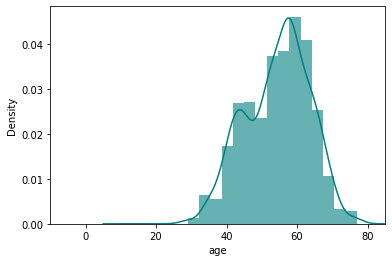

In [75]:
# age 분포 확인
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt 

ax = df["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["age"].plot(kind='density', color='teal')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64


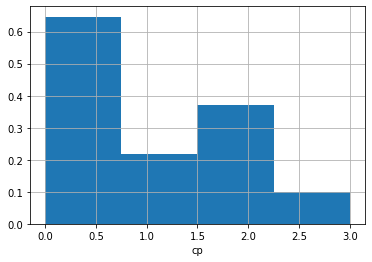

In [76]:
# cp 분포 확인
print(df['cp'].value_counts())

ax = df["cp"].hist(bins=4, density=True, stacked=True)
ax.set(xlabel='cp')
plt.show()

In [77]:
# 숫자 작은 데이터들 분포 확인
print('fbs', '\n',  df['fbs'].value_counts(), '\n')
print('restecg',  '\n', df['restecg'].value_counts(), '\n')
print('exang', '\n', df['exang'].value_counts(), '\n')
print('slope', '\n', df['slope'].value_counts(), '\n')
print('ca', '\n', df['ca'].value_counts(), '\n')
print('thal', '\n', df['thal'].value_counts(), '\n')
print('target', '\n', df['target'].value_counts(), '\n')

fbs 
 0    872
1    153
Name: fbs, dtype: int64 

restecg 
 1    513
0    497
2     15
Name: restecg, dtype: int64 

exang 
 0    680
1    345
Name: exang, dtype: int64 

slope 
 1    482
2    469
0     74
Name: slope, dtype: int64 

ca 
 0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64 

thal 
 2    544
3    410
1     64
0      7
Name: thal, dtype: int64 

target 
 1    526
0    499
Name: target, dtype: int64 



In [78]:
# 원-핫 인코딩
# target은 빼고
training=pd.get_dummies(df, columns=['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
training

,age,sex,cp,trestbps,chol,thalach,oldpeak,target,fbs_0,fbs_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,1,0,125,212,168,1.0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,1,0,140,203,155,3.1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,70,1,0,145,174,125,2.6,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,1,0,148,203,161,0.0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,0,0,138,294,106,1.9,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,164,0.0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
1021,60,1,0,125,258,141,2.8,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1022,47,1,0,110,275,118,1.0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1023,50,0,0,110,254,159,0.0,1,1,0,...,1,1,0,0,0,0,0,0,1,0


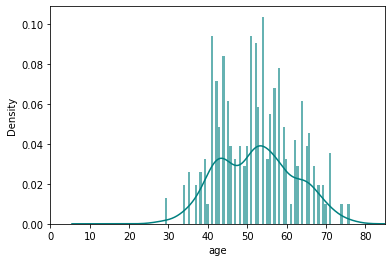

In [79]:
# 나이와 심장병 관계
# 심장병 걸린 사람 정보
age_tbl = training[['age', 'target']]
age_tbl = age_tbl[age_tbl['target']==1]
ax = age_tbl["age"].hist(bins=80, density=True, stacked=True, color='teal', alpha=0.6)
age_tbl["age"].plot(kind='density', color='teal')#선 그래프 추가. Age 컬럼의 밀집도
ax.set(xlabel='age')
plt.xlim(0,85)
plt.show()

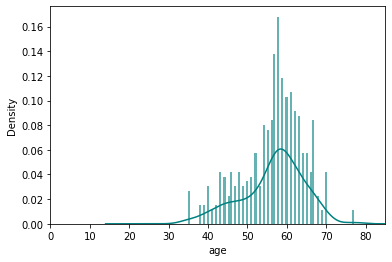

In [80]:
# 나이와 심장병 관계
# 심장병 걸리지 않은 사람 정보
age_tbl2 = training[['age', 'target']]
age_tbl2 = age_tbl2[age_tbl2['target']==0]
ax = age_tbl2["age"].hist(bins=80, density=True, stacked=True, color='teal', alpha=0.6)
age_tbl2["age"].plot(kind='density', color='teal')#선 그래프 추가. Age 컬럼의 밀집도
ax.set(xlabel='age')
plt.xlim(0,85)
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import Binarizer

In [82]:
X = training.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,thalach,oldpeak,fbs_0,fbs_1,restecg_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,1,0,125,212,168,1.0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,53,1,0,140,203,155,3.1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2,70,1,0,145,174,125,2.6,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,61,1,0,148,203,161,0.0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,62,0,0,138,294,106,1.9,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,164,0.0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1021,60,1,0,125,258,141,2.8,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1022,47,1,0,110,275,118,1.0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1023,50,0,0,110,254,159,0.0,1,0,1,...,1,1,0,0,0,0,0,0,1,0


In [83]:
y = training['target']
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [84]:
# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
# 표준화
scaler = StandardScaler( )
X = scaler.fit_transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성

lr_clf = LogisticRegression(max_iter=5000)

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)

print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.8829


In [86]:
import warnings
warnings.simplefilter(action='ignore')

# GridSearchCV : 최적의 하이퍼 파라메터 찾아줌
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(lr_clf, param_grid, cv=5, refit=True)
grid_search.fit(X_train , y_train)
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_search.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_search.best_score_))

best_grid_search = grid_search.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
predictions = grid_search.predict(X_test)
accuracy = accuracy_score(y_test , predictions)
print('테스트 세트에서의 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.8573
테스트 세트에서의 정확도 : 0.8878


In [87]:
# 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grid_search, X , y , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8829
교차 검증 1 정확도: 0.8683
교차 검증 2 정확도: 0.8976
교차 검증 3 정확도: 0.8390
교차 검증 4 정확도: 0.8293
평균 정확도: 0.8634


In [88]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [89]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [90]:
# 임계값 조절
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = grid_search.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[ 77  23]
 [  3 102]]
정확도: 0.8732, 정밀도: 0.8160, 재현율: 0.9714,    F1: 0.8870, AUC:0.9622
임곗값: 0.33
오차 행렬
[[ 77  23]
 [  3 102]]
정확도: 0.8732, 정밀도: 0.8160, 재현율: 0.9714,    F1: 0.8870, AUC:0.9622
임곗값: 0.36
오차 행렬
[[ 79  21]
 [  3 102]]
정확도: 0.8829, 정밀도: 0.8293, 재현율: 0.9714,    F1: 0.8947, AUC:0.9622
임곗값: 0.39
오차 행렬
[[ 80  20]
 [  4 101]]
정확도: 0.8829, 정밀도: 0.8347, 재현율: 0.9619,    F1: 0.8938, AUC:0.9622
임곗값: 0.42
오차 행렬
[[ 83  17]
 [  5 100]]
정확도: 0.8927, 정밀도: 0.8547, 재현율: 0.9524,    F1: 0.9009, AUC:0.9622
임곗값: 0.45
오차 행렬
[[85 15]
 [ 6 99]]
정확도: 0.8976, 정밀도: 0.8684, 재현율: 0.9429,    F1: 0.9041, AUC:0.9622
임곗값: 0.48
오차 행렬
[[85 15]
 [ 8 97]]
정확도: 0.8878, 정밀도: 0.8661, 재현율: 0.9238,    F1: 0.8940, AUC:0.9622
임곗값: 0.5
오차 행렬
[[85 15]
 [ 8 97]]
정확도: 0.8878, 정밀도: 0.8661, 재현율: 0.9238,    F1: 0.8940, AUC:0.9622


In [91]:
# 정확도 가장 높은 임계값 0.48로 실행
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[85 15]
 [ 8 97]]
정확도: 0.8878, 정밀도: 0.8661, 재현율: 0.9238,    F1: 0.8940, AUC:0.9622
